In [1]:
import pandas as pd
import numpy as np
import os
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns


/Users/kyeongseochoi/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv("weather.csv")

In [4]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [5]:
df.shape

(1461, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [9]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [10]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [11]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


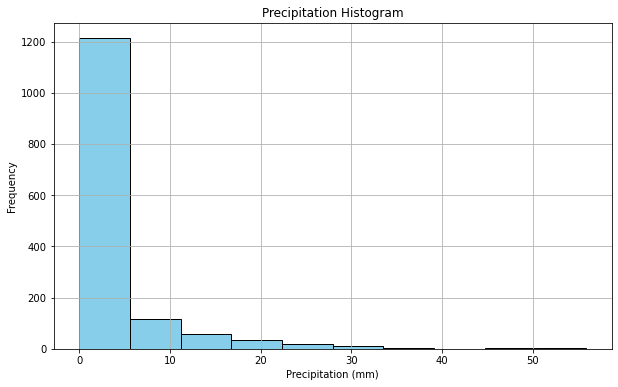

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(df['precipitation'], bins=10, color='skyblue', edgecolor='black')
plt.title('Precipitation Histogram')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Train RMSE: 2.57
Test RMSE: 7.14


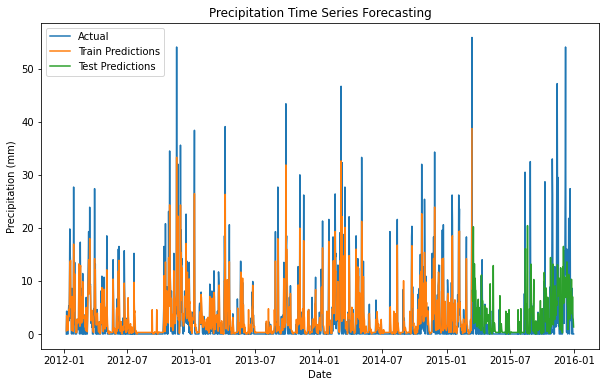

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



# Assuming 'date' is already in datetime format, set it as the index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Define the target variable (precipitation in this case)
target_variable = 'precipitation'

# Create lagged features
for i in range(1, 8):  # Lag features for previous 7 days
    df[f'{target_variable}_lag_{i}'] = df[target_variable].shift(i)

# Drop rows with NaN values resulting from the lag operation
df.dropna(inplace=True)

# Define features (lagged precipitation values)
features = [col for col in df.columns if col.startswith(f'{target_variable}_lag_')]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target_variable], test_size=0.2, shuffle=False)

# Train a Random Forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print(f'Train RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')

# Plot actual vs. predicted precipitation
plt.figure(figsize=(10, 6))
plt.plot(df.index, df[target_variable], label='Actual')
plt.plot(X_train.index, train_predictions, label='Train Predictions')
plt.plot(X_test.index, test_predictions, label='Test Predictions')
plt.title('Precipitation Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df=pd.read_csv("weather.csv")

# Select features and target variable
X = df[['temp_max', 'temp_min', 'wind', 'weather']]  # Features
y = df['precipitation']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the column transformer to one-hot encode the 'weather' column
column_transformer = ColumnTransformer([('encoder', OneHotEncoder(), ['weather'])], remainder='passthrough')

# Apply the column transformer to the features (X)
X_train_encoded = column_transformer.fit_transform(X_train)
X_test_encoded = column_transformer.transform(X_test)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train_encoded, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_encoded)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print('predict the amount of precipitation using regression models.')
print(f'Root Mean Squared Error: {rmse:.2f}')


predict the amount of precipitation using regression models.
Root Mean Squared Error: 5.27
